This is a tryout on deep learning 

# Reference :
1. [Setting Up Google Colab](https://mmiakashs.github.io/blog/2018-09-20-kaggle-api-google-colab/)
2. [FastAi on Colab](https://github.com/corykendrick/fastai_in_colab/blob/master/Using_Google_Colab_for_Fastai.ipynb)
3. [Code1](https://www.kaggle.com/phithor/titanic-using-fast-ai-tabular)
4. [Code2](https://www.kaggle.com/dromosys/fast-ai-titanic)


In [1]:
!pip3 install kaggle

In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()


In [3]:
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
ls ~/.kaggle

kaggle.json*


# Kaggle CLI Sample
## Retrieve Kaggle Competition List

In [6]:
!kaggle competitions list


ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         95           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        202           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        364           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2540           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      19659            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5205           False  
connectx

## List Data Files in a Kaggle Competition

In [7]:
# -c: competition name
!kaggle competitions files -c titanic


name                   size  creationDate         
---------------------  ----  -------------------  
gender_submission.csv   3KB  2018-04-09 05:33:22  
train.csv              60KB  2018-04-09 05:33:22  
test.csv               28KB  2018-04-09 05:33:22  


## Show the leaderboard of a kaggle competitions

In [8]:
!kaggle competitions leaderboard titanic -s

 teamId  teamName               submissionDate       score    
-------  ---------------------  -------------------  -------  
5705094  Zeeshan Patel          2020-12-17 19:02:44  1.00000  
5682488  Hung Khoi              2020-10-29 07:53:19  1.00000  
4982944  Rookie666              2020-10-29 09:25:35  1.00000  
5740265  Sharmith jain          2020-10-29 15:29:00  1.00000  
3598334  HEroKuma               2020-10-29 11:46:41  1.00000  
5708358  Pedro Mendes Odilon    2020-11-04 18:13:48  1.00000  
5723342  Sumanth Pobala         2020-10-30 00:00:21  1.00000  
5749749  blenderwang            2020-11-13 03:32:13  1.00000  
5749745  ChengDaTsai            2020-11-06 02:43:36  1.00000  
5749742  Inel Da                2020-10-30 07:56:37  1.00000  
5750697  Volodymyr Vozniak      2020-10-30 11:14:42  1.00000  
5559660  Madison_Montgomery     2020-10-31 08:36:18  1.00000  
4354238  Loïc Rakotoson         2020-10-31 22:28:49  1.00000  
5545746  Annan Dejene           2020-11-05 01:39:03  1.

# Setting Up FastAi

In [9]:
# Check python version
import sys
sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'

In [10]:
# Install fastAi
!pip3 install fastai

In [11]:
# Install PyTorch
# I haven't needed to do this, but here's how just in case.
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

     |████████████████████████████████| 592.3MB 1.1MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 0.3.0.post4 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.3.0.post4 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 776.7MB 19kB/s 
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4


# Project Setup

## Downloading Titanic dataset

In [12]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.50MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.4MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 60.6MB/s]


In [13]:
!ls

adc.json  gender_submission.csv  sample_data  test.csv	train.csv


## Data Handling

In [14]:
import pandas as pd
import numpy as np
from fastai.tabular import *

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df
# Woo lala 我终于成功read到file了哈哈哈哈哈哈哈哈哈哈

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature Engineering

*   Extract Title from the name column
*   Extract Deck from the first character of the cabin number
*   Fill in the missing Age values with the mean age for passengers with the same title




In [15]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Deck'] = df['Cabin'].str[0]

# find mean age for each Title across train and test data sets
all_df = pd.concat([train_df, test_df], sort=False)
mean_age_by_title = all_df.groupby('Title').mean()['Age']
# update missing ages
for df in [train_df, test_df]:
    for title, age in mean_age_by_title.iteritems():
        df.loc[df['Age'].isnull() & (df['Title'] == title), 'Age'] = age

In [16]:
test_df.Fare.fillna(0,inplace=True)

## FastAi Setup

In [17]:
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']
cont_names = ['Age', 'Fare', 'SibSp', 'Parch']
procs = [FillMissing, Categorify, Normalize]

test = TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
data = (TabularList.from_df(train_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,200)))
                           #.split_by_idx(valid_idx=range(200,400))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

## Training

In [18]:
np.random.seed(101)

In [19]:
#??tabular_learner

In [20]:
# learn = tabular_learner(data, layers=[150, 300], metrics=accuracy) -> 86% accuracy
# learn = tabular_learner(data, layers=[200, 300], metrics=accuracy) -> 87% accuracy
# learn = tabular_learner(data, layers=[200, 400], metrics=accuracy) -> 87.6% accuracy
# learn = tabular_learner(data, layers=[200, 800], metrics=accuracy) -> 83.1% accuracy
# learn = tabular_learner(data, layers=[200, 600], metrics=accuracy) -> 87.64% accuracy
#learn = tabular_learner(data, layers=[60, 20], metrics=accuracy)
learn = tabular_learner(data, layers=[600,200], metrics=accuracy, emb_drop=0.1)
#learn.fit(10)


In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


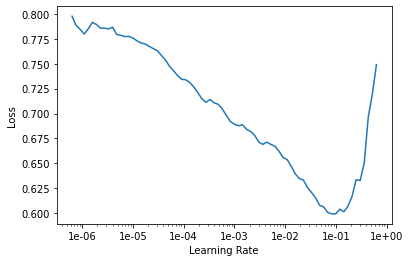

In [22]:
learn.recorder.plot()

In [31]:
#learn.fit(5, 1e-2)
learn.fit_one_cycle(5,1e-2)
learn.fit_one_cycle(5,1e-3)
learn.fit_one_cycle(5,1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.758041,0.853174,0.730000,00:00
1,0.632808,0.588802,0.765000,00:00
2,0.566260,0.457078,0.820000,00:00
3,0.522113,0.457194,0.760000,00:00
4,0.491269,0.447761,0.765000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.415062,0.431896,0.795000,00:00
1,0.411747,0.423722,0.815000,00:00
2,0.404351,0.417231,0.820000,00:00
3,0.406955,0.414727,0.830000,00:00
4,0.402593,0.414344,0.830000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.398034,0.419356,0.820000,00:00
1,0.398648,0.419153,0.820000,00:00
2,0.393911,0.415200,0.825000,00:00
3,0.394233,0.416833,0.830000,00:00
4,0.390662,0.417429,0.825000,00:00


In [32]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,111,15
1,20,54


## Inference
Predictions come as an array of probabilities of death or survival for each passenger in the test set. Use argmax to convert each to `1` or `0` then construct the submission dataframe and save to CSV.

In [33]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [34]:
sub_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': labels})
sub_df.to_csv('submission.csv', index=False)

check what we are submitting looks sensible

In [35]:
sub_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


# Submiting the Result with Kaggle CLI

view previous submissions

using the official kaggle cli 

In [36]:
!kaggle competitions submissions -c titanic

fileName        date                 description        status    publicScore  privateScore  
--------------  -------------------  -----------------  --------  -----------  ------------  
submission.csv  2021-01-09 11:59:01  test kaggle cli 3  complete  0.60047      None          
submission.csv  2021-01-09 09:51:11  test kaggle cli 3  complete  0.65071      None          
submission.csv  2021-01-09 09:49:05  test kaggle cli 3  complete  0.75598      None          
submission.csv  2021-01-09 09:41:22  test kaggle cli 3  complete  0.77990      None          


make submission to kaggle

using the official kaggle cli 

In [37]:
!kaggle competitions submit -c titanic -f submission.csv  -m 'test kaggle cli 3'

100% 2.77k/2.77k [00:04<00:00, 628B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

Confirm Kaggle submission

In [38]:
!kaggle competitions submissions -c titanic

fileName        date                 description        status    publicScore  privateScore  
--------------  -------------------  -----------------  --------  -----------  ------------  
submission.csv  2021-01-09 12:00:16  test kaggle cli 3  complete  0.75837      None          
submission.csv  2021-01-09 11:59:01  test kaggle cli 3  complete  0.60047      None          
submission.csv  2021-01-09 09:51:11  test kaggle cli 3  complete  0.65071      None          
submission.csv  2021-01-09 09:49:05  test kaggle cli 3  complete  0.75598      None          
submission.csv  2021-01-09 09:41:22  test kaggle cli 3  complete  0.77990      None          
